# HOMEWORK 1 by: Yixiao Zhao; Junyi Ma; Xinyi Liu; Xiao Li


### 1. Load the monthly Apple return data

In this first lab, you will analyze the monthly stock returns of Apple (ticker: AAPL).

Let us get started by downloading the monthly return data from https://www.dropbox.com/s/grxj2am0mqjwor9/Homework1.csv?dl=0, and by using the pandas.read_csv() function. Type ?pandas.read_csv in the console to consult the help file.

- What do you have to do before using pandas?

In the pandas.read_csv() function, you should indicate that the data in the CSV file has a header (header argument).


Instructions
1. Create a new variable data_url that contains the URL to the CSV file.
2. Create a new variable aapl_df that contains the data frame with the Apple data. 

### Answer:



In [1]:
import pandas as pd
import numpy as np
data_url="https://www.dropbox.com/s/grxj2am0mqjwor9/Homework1.csv?dl=1"
aapl_df = pd.read_csv(data_url, header = 'infer')
# Why header?

In [2]:
?pd.read_csv(aapl_df)

In [3]:
aapl_df.head()

Date      Open      High       Low     Close Adj Close     Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393  0.423252  117258400
1  1980-12-15  0.488839  0.488839  0.486607  0.486607  0.401170   43971200
2  1980-12-16  0.453125  0.453125  0.450893  0.450893  0.371726   26432000
3  1980-12-17  0.462054  0.464286  0.462054  0.462054  0.380927   21610400
4  1980-12-18  0.475446  0.477679  0.475446  0.475446  0.391969   18362400

### 2. Before you analyze return data, it is a good idea to have (at least) a quick look at the data. Pandas has a number of functions that help you do that:


The head() and tail() method shows you the first and the last part of an  object, respectively.
The type() function shows you the type of an object.
The describe methods provides some useful summaries about the data

Instructions
1. aapl_df should be a data frame object. Show that this is true using the type function 
2. Have a look at the first and the last part of the data. 
3. Show the number of observations in this dataset (we use this function in the past)
4. Show the number of variables in this dataset (we use this function in the past)


In [151]:
#1
type(aapl_df)

pandas.core.frame.DataFrame

In [152]:
#2_First Part
aapl_df.head()

Date      Open      High       Low     Close Adj Close     Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393  0.423252  117258400
1  1980-12-15  0.488839  0.488839  0.486607  0.486607  0.401170   43971200
2  1980-12-16  0.453125  0.453125  0.450893  0.450893  0.371726   26432000
3  1980-12-17  0.462054  0.464286  0.462054  0.462054  0.380927   21610400
4  1980-12-18  0.475446  0.477679  0.475446  0.475446  0.391969   18362400

In [153]:
#2_Last Part
aapl_df.tail()

Date        Open        High         Low       Close   Adj Close  \
9233  2017-07-25  151.800003  153.839996  151.800003  152.740005  152.740005   
9234  2017-07-26  153.350006  153.929993  153.059998  153.460007  153.460007   
9235  2017-07-27  153.750000  153.990005  147.300003  150.559998  150.559998   
9236  2017-07-28  149.889999  150.229996  149.190002  149.500000  149.500000   
9237  2017-07-31  149.899994  150.330002  148.130005  148.729996  148.729996   

        Volume  
9233  18853900  
9234  15781000  
9235  32476300  
9236  17213700  
9237  19614200

In [154]:
#3
aapl_df.shape[0]
# Or we can use: len(aapl_df.index) or len(aapl_df.Date)

9238

In [155]:
#4
aapl_df.shape[1]

7

In [156]:
aapl_df.shape

(9238, 7)

### 3. Getting indexing right

1. It is very important that we get the indentity of each observation right
2. The identity must be unique so there is not uncertainty when we refer to it
3. Note that Pandas created a new column (column 0) that gives the "name" to each observation
4. It uses as a name a sequence of numbers so each name is unique
5. Here we can have a more useful name, the date, which is also unique in this context (there is only one observation per day!)
6. In pandas we refer to this indentiy as the "index" of the datafram

Instructions:
1. the .ix(name) allow you to recover a particular observation, use this method to recover the date 11th date in the data set. (recall that it starts from zero)
2. use ?pandas.read_csv to find out how to tell pandas that column 0 of the orginal data set should be index
3. Show that now the first colum is the date
4. Now use the ix method to recover the return in 09/15/2008 (pay attention in the format)

In [157]:
#1
aapl_df.ix[10:10,0:1]
#1 Or We can also use iloc here
aapl_df.iloc[10:11,0:1]

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


Date
10  1980-12-29

In [158]:
#2
#aapl_df.set_index('Date', inplace=True) This is also worked.
aapl_df = pd.read_csv(data_url,index_col=0, 
                         parse_dates=True,na_values=-99)
## What is parse_dates?
## parse_dates tells python that something looking like a date is a date, not just a number or just a bunch of digits.
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9238 entries, 1980-12-12 to 2017-07-31
Data columns (total 6 columns):
Open         9238 non-null object
High         9238 non-null object
Low          9238 non-null object
Close        9238 non-null object
Adj Close    9238 non-null object
Volume       9238 non-null object
dtypes: object(6)
memory usage: 505.2+ KB


In [159]:
#3
aapl_df.index
aapl_df.head()

Open      High       Low     Close Adj Close     Volume
Date                                                                   
1980-12-12  0.513393  0.515625  0.513393  0.513393  0.423252  117258400
1980-12-15  0.488839  0.488839  0.486607  0.486607  0.401170   43971200
1980-12-16  0.453125  0.453125  0.450893  0.450893  0.371726   26432000
1980-12-17  0.462054  0.464286  0.462054  0.462054  0.380927   21610400
1980-12-18  0.475446  0.477679  0.475446  0.475446  0.391969   18362400

In [160]:
#4
#import datetime
#datetime.datetime.strptime("2008-09-15", "%Y-%m-%d").strftime("%m/%d/%Y")
#Code above was not right, they are not the answer, they are what I was trying to do
aapl_df.ix['09/15/2008']

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


Open         20.290001
High         21.098572
Low          20.051428
Close        20.051428
Adj Close    18.110229
Volume       230158600
Name: 2008-09-15 00:00:00, dtype: object

### 4. Getting the type of the variables right

Because pandas is very flexible and cna handle multiple types it is very important to check that the type of each variable was imported correctly, otherwise we won't be able to do manipulations 

Instructions
1. Take the mean of Volume by writing aapl_df['Volume'].mean()
2. To see why that did not work find out the type of each variable by using the method info()
  - Where you see object in the fourth column, you should be reading float, int, and not a generic object type
3. To fix this  we need to be more careful in the import. A Must check is how missing values are reported in this data
4. Open the data set in excel and find what is the term used as a missing value
5. Now add na_values='term' to our import code: 
aapl_df=pandas.read_csv(data_url,index_col=0,na_values='term')
6. What is the mean of volume?


In [15]:
 #1
# I have already run this: aapl_df['Volume'].mean()
#This have a error

In [162]:
#2
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9238 entries, 1980-12-12 to 2017-07-31
Data columns (total 6 columns):
Open         9238 non-null object
High         9238 non-null object
Low          9238 non-null object
Close        9238 non-null object
Adj Close    9238 non-null object
Volume       9238 non-null object
dtypes: object(6)
memory usage: 825.2+ KB


In [163]:
#3
#4
# Missing value 'null'

In [6]:
#5
aapl_df=pd.read_csv(data_url,index_col=0,na_values='null')

In [7]:
#5 Check
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9238 entries, 1980-12-12 to 2017-07-31
Data columns (total 6 columns):
Open         9237 non-null float64
High         9237 non-null float64
Low          9237 non-null float64
Close        9237 non-null float64
Adj Close    9237 non-null float64
Volume       9237 non-null float64
dtypes: float64(6)
memory usage: 505.2+ KB


In [8]:
#6
aapl_df['Volume'].mean()

89725358.35227887

### 5. Returns

Lets focus on close-to-close returns, i.e. the return in stock between the closing of two subsequent days

1. Construct the variable Price by selecting the Close column
2. Compute simple returns 
    - we want
         Return[t+1]=(Price[t+1]-Price[t])/Price[t]
    - First try Return=(Price[1:]-Price[:-1])/Price[:-1]
    - What this is trying to do?
    - Can you Explain why this did not work? 
3. Do Return1=(Price.values[1:]-Price.values[:-1])/Price.values[:-1]  
   -  here we are directly selecting the values of the dataseries obsject
4. what did you note about the type of the Return variable? 

5. To stay within Pandas we have to use the shift method, where you use Price.shift(1) to lag the data one period. You can also type shift(-1) to lead the data.

So you write Return=(Price[1:]-Price.shift(1))/Price.shift(1) 

6. What are the differences between the Return1 and Return objects? What are the similarilities?

7. Try to compute the mean of both series. What you think is going on with Return1?

8. Using the Return series Compute mean, standard deviation, median, min, max, the date of the minimum return, the date of the maximum return, 

9. use the .quantile(number) method to find the 5% quantile of apple stock. Explain what this number means.

In [9]:
#Instruction 1
Price = aapl_df['Close']
type(Price)

pandas.core.series.Series

In [14]:
#Instruction 2
aapl_df['Return']=(Price[1:]-Price[:-1])/Price[:-1] 
# We want to compute the percentage growth rate.
# Why do not work? Price is a series, you need to directly extract the value from the original dataseries.

Date
1980-12-12      0.513393
1980-12-15      0.486607
1980-12-16      0.450893
1980-12-17      0.462054
1980-12-18      0.475446
1980-12-19      0.504464
1980-12-22      0.529018
1980-12-23      0.551339
1980-12-24      0.580357
1980-12-26      0.633929
1980-12-29      0.642857
1980-12-30      0.627232
1980-12-31      0.609375
1981-01-02      0.616071
1981-01-05      0.602679
1981-01-06      0.575893
1981-01-07      0.551339
1981-01-08      0.540179
1981-01-09      0.569196
1981-01-12      0.564732
1981-01-13      0.544643
1981-01-14      0.546875
1981-01-15      0.558036
1981-01-16      0.553571
1981-01-19      0.587054
1981-01-20      0.569196
1981-01-21      0.580357
1981-01-22      0.587054
1981-01-23      0.584821
1981-01-26      0.575893
                 ...    
2017-06-16    142.270004
2017-06-19    146.339996
2017-06-20    145.009995
2017-06-21    145.869995
2017-06-22    145.630005
2017-06-23    146.279999
2017-06-26    145.820007
2017-06-27    143.729996
2017-06-28    145.83

In [11]:
#Instruction 3
Return1=(Price.values[1:]-Price.values[:-1])/Price.values[:-1]
Return1


array([-0.05217446, -0.07339393,  0.0247531 , ..., -0.01889749,
       -0.00704037, -0.00515053])

In [12]:
#Instruction 4
# The type of the Return variable is array.

In [171]:
#Instruction 5
Return = (aapl_df['Close'].shift(0)-aapl_df['Close'].shift(1))/aapl_df['Close'].shift(1)
aapl_df['Return']= Return
aapl_df['Return'].head()

Date
1980-12-12         NaN
1980-12-15   -0.052174
1980-12-16   -0.073394
1980-12-17    0.024753
1980-12-18    0.028984
Name: Return, dtype: float64

In [172]:
#1. The output of Return is series,the output of Return1 is array.
#1. Similarities: They have the same value

In [173]:
#2_1
[Return.mean(),Return1.mean()]
# Return1 shows nan

[0.0010531533291725911, nan]

In [174]:
#3_1
[Return.mean(), Return.std(), Return.median(), Return.min(), Return.max()]

[0.0010531533291725911,
 0.029257625526893597,
 0.0,
 -0.51869156799720739,
 0.33227854830957942]

In [175]:
#3_2 This is also an option of # 3
Return.describe()

count    9235.000000
mean        0.001053
std         0.029258
min        -0.518692
25%        -0.013893
50%         0.000000
75%         0.015210
max         0.332279
Name: Close, dtype: float64

In [176]:
#3_3 Min Date
Return.index[Return==Return.min()]

Index(['2000-09-29'], dtype='object', name='Date')

In [177]:
#3_4 Max Date
Return.index[Return==Return.max()]

Index(['1997-08-06'], dtype='object', name='Date')

In [178]:
#4
Return.quantile(0.05)
# This number means the range of 5% lowest rate of return of apple stock is from min:-0.5187 to -0.0422, this 

-0.04217592335908127

### Plotting

Pandas has buil plot functionality that is based on the matplotlib package we say in class

It is really easy and intutiive (here the reference: https://pandas.pydata.org/pandas-docs/stable/visualization.html)

1. Make a time-series plot of the return data (always using Return dataframe object)

   ax1=Return.plot()
   
2. Make a histogram with 100 bins

   ax2=Return.hist(bins=100)
   
3. Make a plot of the cumulative returns

 Follow the steps we did in class to construc the cumulative and then plot
 
4. Make a plot of the close price

compare with the cumulative return plot. What do you notice? Is this always true?

5. Make a plot of the square of returns , this is a good proxy for volatility 
 - use numpy.power(series,2), this tells python to elevate 

6. Add a label to the y-axis, x-axis decribing each varaible plotted (when not generated automatically)

  - Tip: use the plot object ax1.(Tab) to find the mehtods that can be used to change the plot

In [179]:
import matplotlib.pyplot as plt

In [180]:
import numpy as numpy

In [181]:
%matplotlib inline



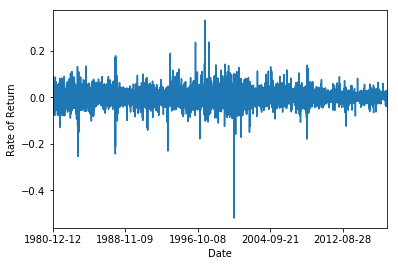

In [182]:
#1
ax1=Return.plot()
plt.ylabel('Rate of Return')

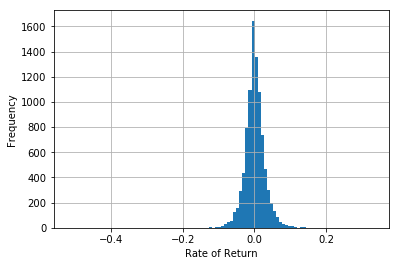

In [183]:
#2
ax2=Return.hist(bins=100)
plt.xlabel('Rate of Return')
plt.ylabel('Frequency')

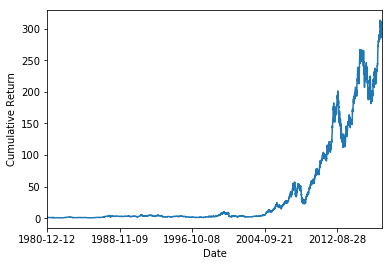

In [184]:
#3
ax3=((1+Return).cumprod()).plot()
plt.ylabel('Cumulative Return')

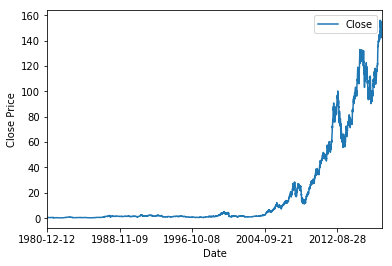

In [185]:
#4
ax4 = aapl_df[['Close']].plot()
plt.ylabel('Close Price')

In [186]:
#4 Compare: ax3 and ax4 have the same shape! This is always true, because return is based on close price.

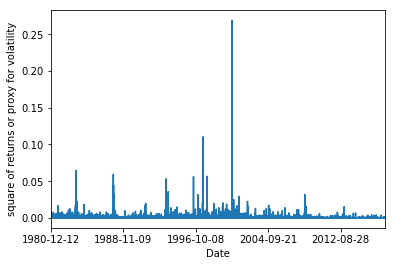

In [187]:
#5
ax5 = (numpy.power(Return,2)).plot()
plt.ylabel('square of returns or proxy for volatility') 